## Pretrained Covenet

In [1]:
from keras.applications import VGG16

D:\anaconda3\envs\Keras_DL_Book\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
conv_base = VGG16(weights="imagenet", include_top = False, input_shape = (150, 150, 3))

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
base_dir = "cats_and_dogs_small/"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [7]:
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode="binary")
    i = 0
    for inputs_batch, labels_batch in generator:
        feature_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1)*batch_size] = feature_batch
        labels[i * batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
        return features, labels

In [8]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 5s 5s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 4s 4s/step


In [9]:
train_features = np.reshape(train_features, (2000 , 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000 , 4 * 4 * 512))
test_features = np.reshape(test_features, (1000 , 4 * 4* 512))

In [10]:
from keras import models
from keras import layers
from keras import optimizers

In [11]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [12]:
model.compile(optimizer= optimizers.RMSprop(learning_rate=2e-5),
             loss= "binary_crossentropy",
             metrics=['acc'])

In [13]:
history = model.fit(train_features, train_labels, epochs=30, batch_size = 20,
                   validation_data= (validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 9s 65ms/step - loss: 0.6912 - acc: 0.9870 - val_loss: 0.6890 - val_acc: 0.9890
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6837 - acc: 0.9970 - val_loss: 0.6818 - val_acc: 0.9900
Epoch 3/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6766 - acc: 0.9970 - val_loss: 0.6742 - val_acc: 0.9890
Epoch 4/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6674 - acc: 0.9970 - val_loss: 0.6670 - val_acc: 0.9890
Epoch 5/30
100/100 [==============================] - 5s 55ms/step - loss: 0.6585 - acc: 0.9970 - val_loss: 0.6596 - val_acc: 0.9880
Epoch 6/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6494 - acc: 0.9985 - val_loss: 0.6502 - val_acc: 0.9890
Epoch 7/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6414 - acc: 0.9980 - val_loss: 0.6415 - val_acc: 0.9890
Epoch 8/30
100/100 [==============================] - 5s 53ms/step - 

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [15]:
epochs = range(1, len(acc)+1)

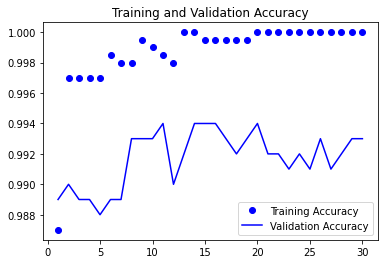

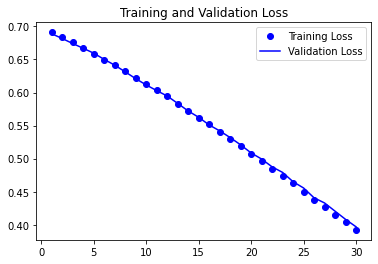

In [16]:
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
print("Trainable Number of weights before freezing the conv base : ", len(model.trainable_weights))

Trainable Number of weights before freezing the conv base :  30


In [20]:
conv_base.trainable = False

In [21]:
print("Trainable Number of weights after freezing the conv base : ", len(model.trainable_weights))

Trainable Number of weights after freezing the conv base :  4


In [22]:
train_datagen = ImageDataGenerator(rescale= 1./25, rotation_range=40, shear_range=0.2,
                                  width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2,
                                  horizontal_flip=True, fill_mode="nearest")

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode="binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20,
                                                       class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
model.compile(loss= "binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [26]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=5, validation_data=validation_generator,
                   validation_steps=50)

Epoch 1/5
100/100 [==============================] - 295s 3s/step - loss: 0.4633 - acc: 0.7720 - val_loss: 0.5768 - val_acc: 0.6540
Epoch 2/5
100/100 [==============================] - 306s 3s/step - loss: 0.2975 - acc: 0.8680 - val_loss: 0.5472 - val_acc: 0.6780
Epoch 3/5
100/100 [==============================] - 313s 3s/step - loss: 0.2576 - acc: 0.8900 - val_loss: 0.5396 - val_acc: 0.6860
Epoch 4/5
100/100 [==============================] - 303s 3s/step - loss: 0.2210 - acc: 0.9055 - val_loss: 0.6383 - val_acc: 0.6300
Epoch 5/5
100/100 [==============================] - 307s 3s/step - loss: 0.2130 - acc: 0.9160 - val_loss: 0.6003 - val_acc: 0.6490


In [27]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [28]:
model.compile(loss= "binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=1e-5),
             metrics=['acc'])

In [29]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=10, validation_data=validation_generator,
                   validation_steps=50)

Epoch 1/10
100/100 [==============================] - 363s 4s/step - loss: 0.2065 - acc: 0.9075 - val_loss: 0.4778 - val_acc: 0.7430
Epoch 2/10
100/100 [==============================] - 362s 4s/step - loss: 0.1602 - acc: 0.9355 - val_loss: 0.7009 - val_acc: 0.6340
Epoch 3/10
100/100 [==============================] - 361s 4s/step - loss: 0.1348 - acc: 0.9420 - val_loss: 0.5843 - val_acc: 0.6850
Epoch 4/10
100/100 [==============================] - 370s 4s/step - loss: 0.1429 - acc: 0.9475 - val_loss: 0.6155 - val_acc: 0.6640
Epoch 5/10
100/100 [==============================] - 383s 4s/step - loss: 0.1215 - acc: 0.9460 - val_loss: 0.4025 - val_acc: 0.7990
Epoch 6/10
100/100 [==============================] - 359s 4s/step - loss: 0.1072 - acc: 0.9615 - val_loss: 0.4810 - val_acc: 0.7430
Epoch 7/10
100/100 [==============================] - 364s 4s/step - loss: 0.1135 - acc: 0.9565 - val_loss: 0.6127 - val_acc: 0.6800
Epoch 8/10
100/100 [==============================] - 359s 4s/step - 

In [30]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150,150),
                                                 batch_size = 20, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [31]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)

50/50 [==============================] - 100s 2s/step - loss: 0.5783 - acc: 0.7130


In [32]:
print("Test Accuracy : ",test_acc)

Test Accuracy :  0.7129999995231628
